### Stock Price/ Sentiment Indicators
Goal of this notebook:
1. Learn how to pull historic stock prices with python
2. Explore stock proces and learn how to plot them
3. Learn how to pull historic tweet data about a specific stock
4. Run sentiment analysis on tweets
5. See if there are any leading indicators of stock prices with sentiment

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

### Example Pulling a Stock


In [4]:
msft = yf.Ticker("MSFT")

In [7]:
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055241,0.063365,0.055241,0.060657,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060657,0.063907,0.060657,0.062823,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062823,0.064448,0.062823,0.063907,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063907,0.064448,0.061740,0.062281,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062281,0.062823,0.060657,0.061198,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-21 00:00:00-05:00,254.479996,255.490005,251.589996,252.669998,28397400,0.0,0.0
2023-02-22 00:00:00-05:00,254.089996,254.339996,250.339996,251.509995,22491100,0.0,0.0
2023-02-23 00:00:00-05:00,255.559998,256.839996,250.479996,254.770004,29219100,0.0,0.0


<AxesSubplot:xlabel='Date'>

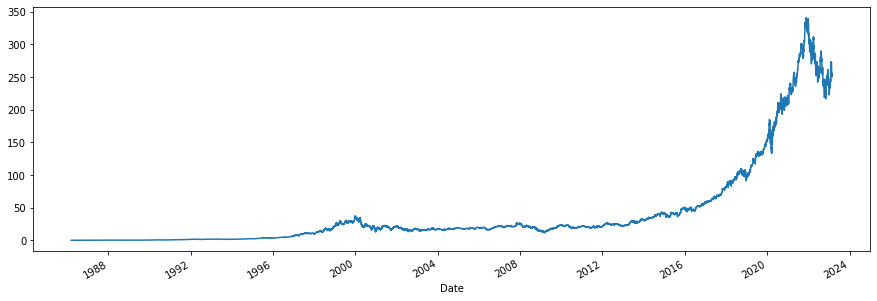

In [9]:
hist['Open'].plot(figsize=(15,5))

### Pull a bunch of stocks
- 3 Years of history

In [22]:
stocks = ['^GSPC','ETSY','PINS', 'SQ', 'SHOP', 'O','MELI', 'ISRG', 'DIS', 'AMZN', 'ZM', 'PFE','CLX','DPZ','BRK-B']

In [24]:
hists = {}

for s in stocks:
  tkr = yf.Ticker(s)
  history = tkr.history(period="3y")
  hists[s] = history

### Plot the Stock Price

In [31]:
symbol = "^GSPC"
temp_df = hists[symbol].copy()

In [35]:
for symbol in stocks:

  temp_df = hists[symbol].copy()

  fig = go.Figure(
    data=[
      go.Candlestick(
        x=temp_df.index,
                  open=temp_df['Open'],
                  high=temp_df['High'],
                  low=temp_df['Low'],
                  close=temp_df['Close'])])

  fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    height = 500,
    paper_bgcolor = "LightSteelBlue",
    title=symbol
  )

  fig.show()

### Pull Tweets about each Stock

In [41]:
symbol = 'DIS'

In [42]:
# importing libraries and packages
import snscrape.modules.twitter as sntwitter
import pandas
from tqdm.notebook import tqdm

# Creating list to append tweet data
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in tqdm(
    enumerate(
        sntwitter.TwitterSearchScraper(
            f"${symbol} since:2019-11-04 until:2023-02-28"
        ).get_items()
    ),
    total=12000,
):  # declare a username
    if i > 12000:  # number of tweets you want to scrape
        break
    tweets_list.append(
        [tweet.date, tweet.id, tweet.content, tweet.user.username]
    )  # declare the attributes to be returned
# Creating a dataframe from the tweets list above
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)

  0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/1q/0jbkkwh96qn59y5vsfmsmp3r0000gn/T/ipykernel_3328/2483062720.py:21: FutureWarning:

content is deprecated, use rawContent instead

/var/folders/1q/0jbkkwh96qn59y5vsfmsmp3r0000gn/T/ipykernel_3328/2483062720.py:21: FutureWarning:

username is deprecated, use user.username instead



In [45]:
tweet_df

,Datetime,Tweet Id,Text,Username
0,2023-02-27 23:59:13+00:00,1630356912863600642,Warner Bros. Discovery's Zaslav is strategical...,JoinStockCast
1,2023-02-27 23:57:20+00:00,1630356439926718464,To enhance your experience in trading and get ...,MURALIE622
2,2023-02-27 23:52:58+00:00,1630355339655929856,🇺🇸2/27シグナル\n\n新高値🚀\n$FIX $RS $SMCI $STRL $TMDX...,koziii
3,2023-02-27 23:52:45+00:00,1630355288166629376,$OPTI $JADA $RNWF $NVAX $BA $PBI $KODK $KNDI $...,Keanu5004
4,2023-02-27 23:49:03+00:00,1630354356406210560,Alerts given\nTrading Chat on Discord!👇\n\nhtt...,Smith28301
...,...,...,...,...
996,2023-02-24 16:39:18+00:00,1629159040910610435,When is ABC News and parent $DIS going to canc...,KrausTamaki
997,2023-02-24 16:38:27+00:00,1629158826355331072,"$DIS swing first long buy hit at open $99.42, ...",BenBSP
998,2023-02-24 16:38:20+00:00,1629158800224649216,$IBM $PG $AA $VZ $SQ $SHOP $JBHT $CVX $ASML $U...,mahinto00987
999,2023-02-24 16:38:11+00:00,1629158759678500865,$DIS Has A Neutral #Technical Analysis Score (...,OptionsMaxPain
